<a href="https://colab.research.google.com/github/Priyabrat845/Unsupervised-learning/blob/main/Mall_Customer_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**

**Gucci (Italian luxury brand of fashion and leather goods) wants to set up a shop in the mall. You need to send push notification to the customer about this event.** 

**Find who will be the customers for the targeted marketing.** 

**Initial Hypothesis :**

Annual Income Vs Spending Score -

Mostly five types of customer :

Careful : High Income and Low Spending Score

Standard : Average Income and Average Spending Score

Target : High Income and High Spending Score

Careless : Low Income and High Spending Score

Sensible : Low Income and Low Spending Score 








In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Importing the dataset
dataset=pd.read_csv('/content/drive/MyDrive/Rough works/Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dataset.shape

(200, 5)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
X = dataset.iloc[:, 3:5].values # Columns of interest

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

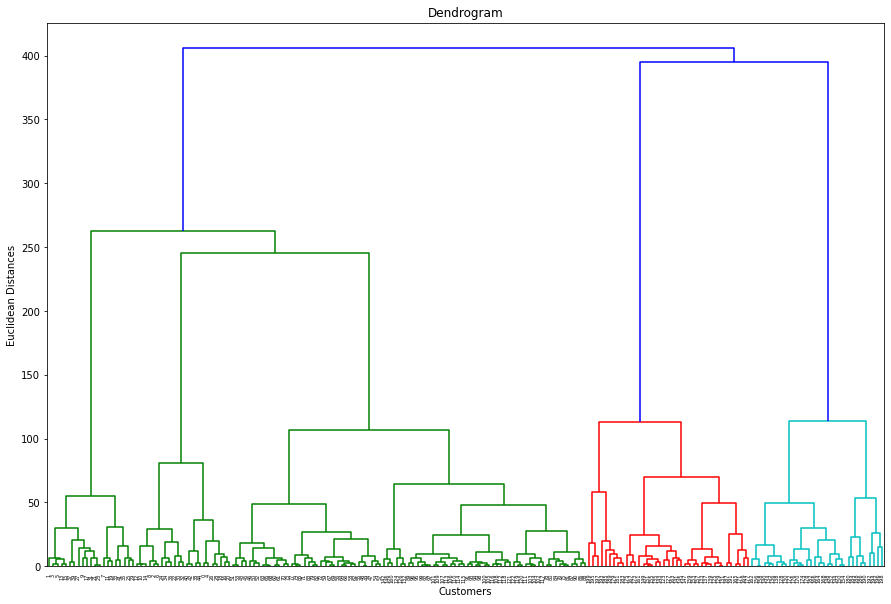

In [10]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

More the distance of the vertical lines in the dendrogram, more the distance between those clusters.

We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line).

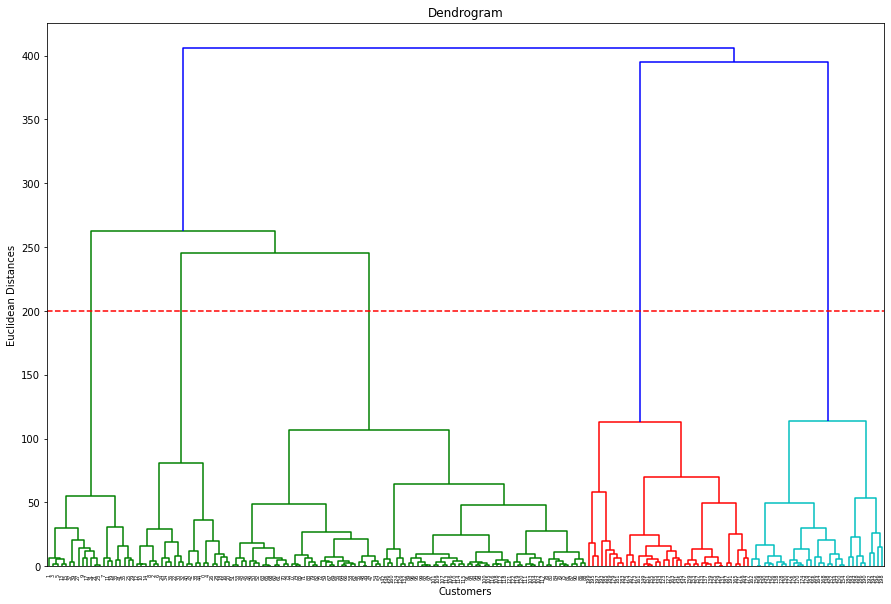

In [11]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=200, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

**The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.**

So,the number of Clusters = 5

In [12]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

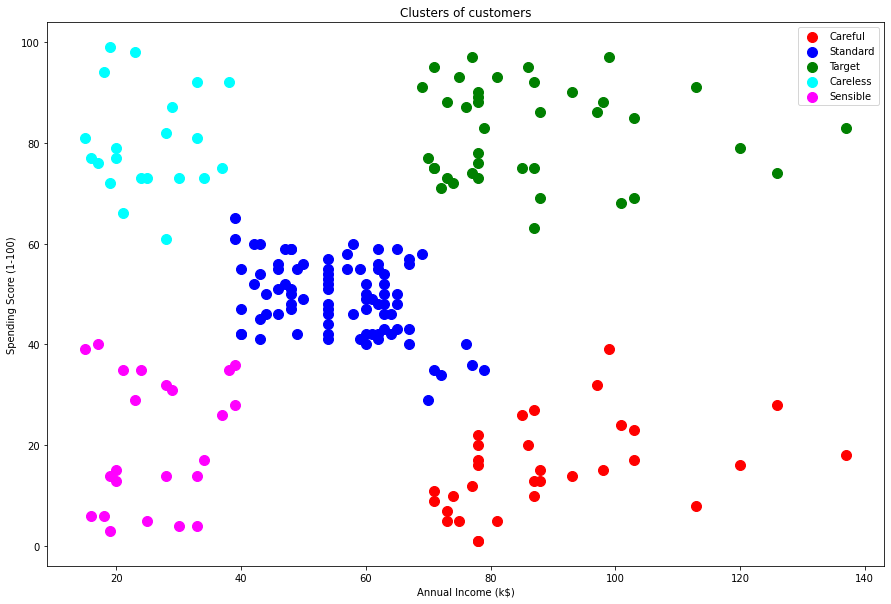

In [13]:
# Visualizing the clusters (two dimensions only)
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [14]:
np.unique(y_hc,return_counts=True)

(array([0, 1, 2, 3, 4]), array([32, 85, 39, 21, 23]))

## **Conclusion**

From the above clustering we can conclude that, we need to targer the **Target** & **Careless** cluster people to expand the business.